In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

# read data
df = pd.read_csv("/content/drive/MyDrive/DMML PROJECT/data.csv")
# data overview
df.head()

# shuffle the data because data in series
df = df.sample(frac=1)

df.iloc[:10]



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
267,8910499,B,13.59,21.84,87.16,561.0,0.07956,0.08259,0.040720,0.021420,0.1635,0.05859,0.3380,1.9160,2.591,26.76,0.005436,0.024060,0.030990,0.009919,0.02030,0.003009,14.80,30.04,97.66,661.5,0.10050,0.17300,0.14530,0.06189,0.2446,0.07024,NaN
52,857374,B,11.94,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,0.1868,0.06110,0.2273,0.6329,1.520,17.47,0.007210,0.008380,0.013110,0.008000,0.01996,0.002635,13.10,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408,NaN
29,853201,M,17.57,15.05,115.00,955.1,0.09847,0.11570,0.098750,0.079530,0.1739,0.06149,0.6003,0.8225,4.655,61.10,0.005627,0.030330,0.034070,0.013540,0.01925,0.003742,20.01,19.52,134.90,1227.0,0.12550,0.28120,0.24890,0.14560,0.2756,0.07919,NaN
36,854268,M,14.25,21.72,93.63,633.0,0.09823,0.10980,0.131900,0.055980,0.1885,0.06125,0.2860,1.0190,2.657,24.91,0.005878,0.029950,0.048150,0.011610,0.02028,0.004022,15.89,30.36,116.20,799.6,0.14460,0.42380,0.51860,0.14470,0.3591,0.10140,NaN
400,90439701,M,17.91,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.119800,0.2113,0.07115,0.4030,0.7747,3.123,41.51,0.007159,0.037180,0.061650,0.010510,0.01591,0.005099,20.80,27.78,149.60,1304.0,0.18730,0.59170,0.90340,0.19640,0.3245,0.11980,NaN
350,899187,B,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.011620,0.1671,0.05731,0.3534,0.6724,2.225,26.03,0.006583,0.006991,0.005949,0.006296,0.02216,0.002668,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,NaN
144,869254,B,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,0.2525,1.2390,1.806,17.74,0.006547,0.017810,0.020180,0.005612,0.01671,0.002360,11.95,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769,NaN
458,9112594,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.012060,0.017620,0.1667,0.05449,0.2621,1.2320,1.657,21.19,0.006054,0.008974,0.005681,0.006336,0.01215,0.001514,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291,NaN
529,918465,B,12.07,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,0.06608,0.2513,0.5040,1.714,18.54,0.007327,0.011530,0.017980,0.007986,0.01962,0.002234,13.45,15.77,86.92,549.9,0.15210,0.16320,0.16220,0.07393,0.2781,0.08052,NaN
365,901088,M,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.097990,0.077850,0.1618,0.05557,0.5781,0.9168,4.218,72.44,0.006208,0.019060,0.023750,0.014610,0.01445,0.001906,24.31,26.37,161.20,1780.0,0.13270,0.23760,0.27020,0.17650,0.2609,0.06735,NaN


In [ ]:
# drop the unnamed and id columns.
df = df.drop(columns=['Unnamed: 32', 'id'])

In [ ]:
# no of rows and columns
df.shape

(569, 31)

In [ ]:
# Checking the data types
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
# Except 'diagnosis' all the columns are numeric
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# check for null values in dataset
df.isnull().values.any()


False

In [ ]:
# Count class labels
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

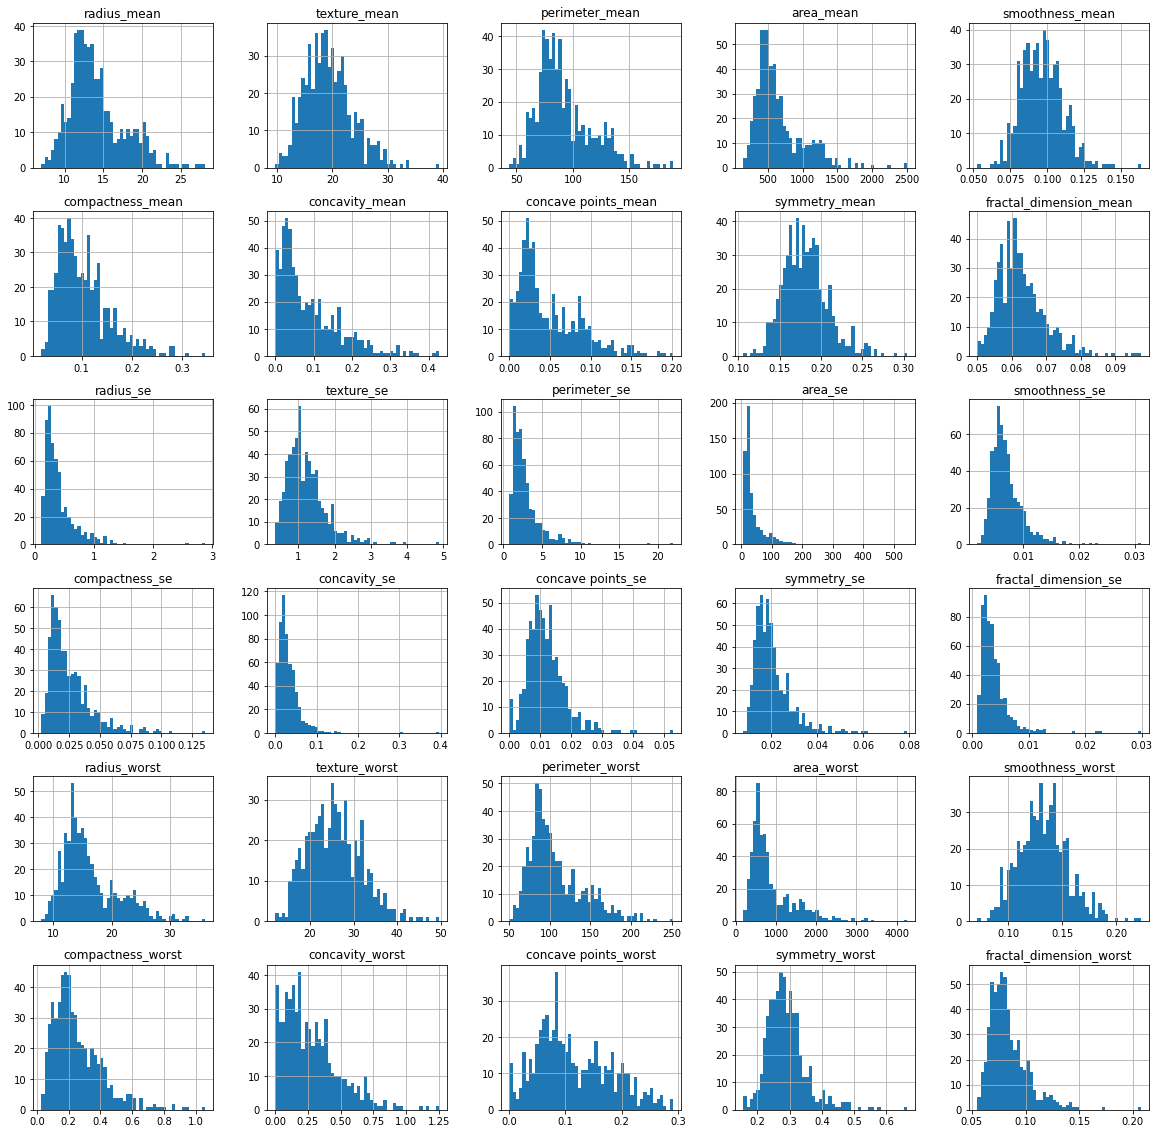

In [ ]:
# Data visualization to create histogram
df.hist(bins=50, figsize=(20, 20))
plt.show()

In [ ]:
# Scatter matrix to check correlation between two attributes
sns.pairplot(df, hue='diagnosis')

# Count each label
ax = sns.countplot(y='diagnosis', data=df, palette='Set2')

# Finding correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax)

print(df.groupby('diagnosis').size())
sns.countplot(df['diagnosis'],label="Count")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

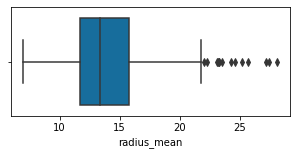

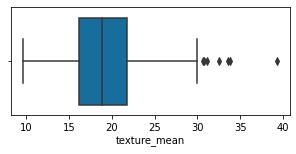

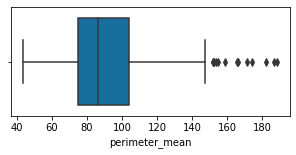

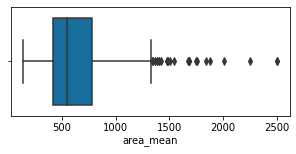

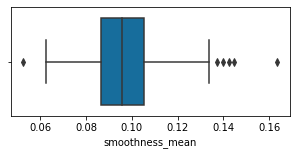

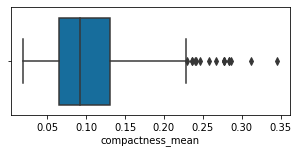

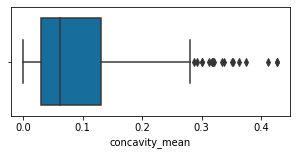

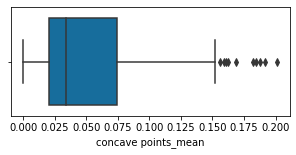

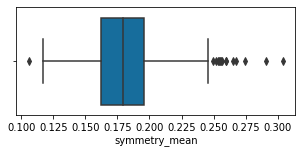

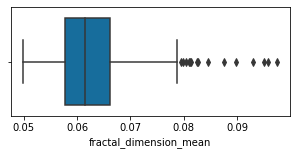

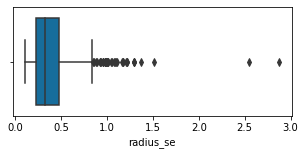

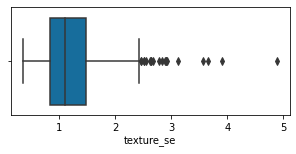

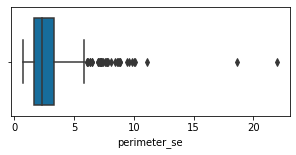

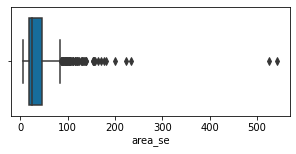

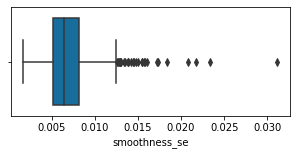

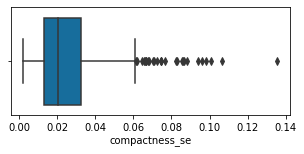

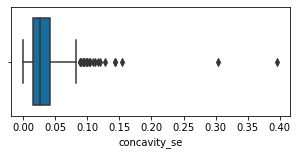

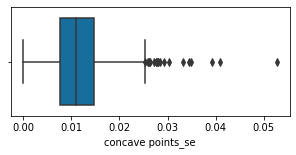

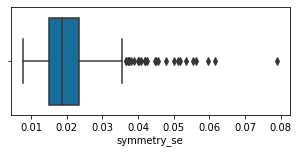

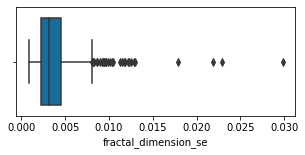

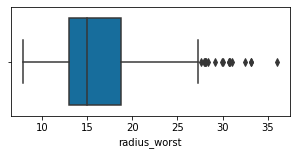

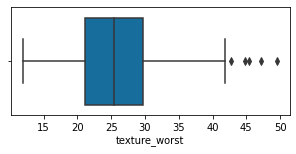

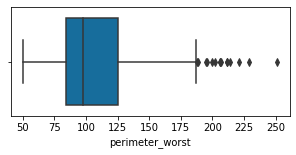

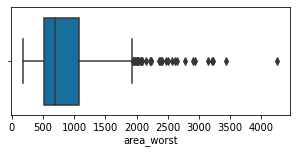

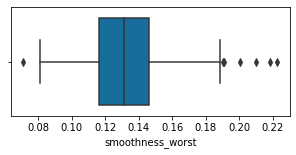

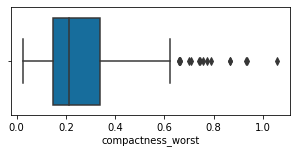

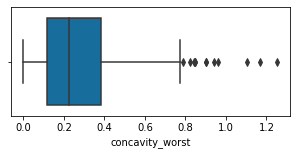

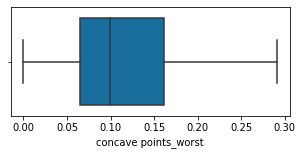

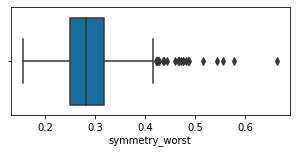

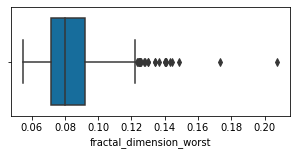

In [ ]:
# box plot to check outlier in each category
def boxPlot(dff):
    d = dff.drop(columns=['diagnosis'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d, palette="colorblind")

boxPlot(df)



In [ ]:
# Quartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
inter_quartile_range = Q3 - Q1
# quartiles and interquartile range
df_out = df[~((df < (Q1 - (1.5 * inter_quartile_range))) | (df > (Q3 + (1.5 * inter_quartile_range)))).any(axis=1)]
df.shape, df_out.shape

((569, 31), (398, 31))

In [ ]:
# Separate labels and features
X = df_out.drop(columns=['diagnosis'])
y = df_out['diagnosis']

# Convert the M to 1 and B to 0
label = LabelEncoder()
y = label.fit_transform(y)
y[:20]

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
# Spilt the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# we used 30% test data
# check the size before beginning
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((278, 30), (120, 30), (278,), (120,))

In [ ]:
# cross validation function
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]

def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]


def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]


def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]


def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)

 # custom accuracy
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N, 2)

 # cross validation purpose
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}

def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc']) 

# acc list and rcc list stores the output of each model
acc = []
roc = []         

In [ ]:
# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

Naive Bayes : 
Training Set Accuracy :  0.9532374100719424
Test Set Accuracy 0.9416666666666667 ROC 0.9204545454545454
True Positive:  [6 6 7 7 7 6 6 6 6 6]
True Negative:  [21 21 18 19 21 20 20 20 20 21]
False Negative:  [0 0 0 0 0 1 1 1 0 0]
False Positive:  [1 1 3 2 0 1 1 1 1 0]
Accuracy:  [0.96 0.96 0.89 0.93 1.   0.93 0.93 0.93 0.96 1.  ]


In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train = model.predict(X_train)

# find accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Logistic Regression : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

# cross validation shows how accurate our model is
result = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
Logistic Regression : 
Training Set Accuracy :  0.9532374100719424
Test Set Accuracy 0.925 ROC 0.9090909090909092
True Positive:  [4 5 6 6 6 5 6 7 5 5]
True Negative:  [20 20 19 21 21 21 21 21 21 21]
False Negative:  [2 1 1 1 1 2 1 0 1 1]
False Positive:  [2 2 2 0 0 0 0 0 0 0]
Accuracy:  [0.86 0.89 0.89 0.96 0.96 0.93 0.96 1.   0.96 0.96]


In [ ]:
# Support Vector Machine
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Support Vector Machine : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
Support Vector Machine : 
Training Set Accuracy :  0.9820143884892086
Test Set Accuracy 0.95 ROC 0.9360795454545455
True Positive:  [5 6 7 6 7 6 7 7 5 6]
True Negative:  [21 22 21 21 21 21 21 21 20 21]
False Negative:  [1 0 0 1 0 1 0 0 1 0]
False Positive:  [1 0 0 0 0 0 0 0 1 0]
Accuracy:  [0.93 1.   1.   0.96 1.   0.96 1.   1.   0.93 1.  ]


In [ ]:
# KNN
model = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("K-Nearest Neighbors : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
K-Nearest Neighbors : 
Training Set Accuracy :  0.9424460431654677
Accuracy 0.9166666666666666 ROC 0.8934659090909091
True Positive:  [4 5 6 6 6 5 7 6 5 5]
True Negative:  [22 20 20 21 20 20 21 21 21 21]
False Negative:  [2 1 1 1 1 2 0 1 1 1]
False Positive:  [0 2 1 0 1 1 0 0 0 0]
Accuracy:  [0.93 0.89 0.93 0.96 0.93 0.89 1.   0.96 0.96 0.96]


In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=20, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Random Forest : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
Random Forest : 
Training Set Accuracy :  0.9964028776978417
Accuracy 0.9416666666666667 ROC 0.890625
True Positive:  [6 5 6 6 6 5 5 6 6 5]
True Negative:  [22 21 20 20 20 20 20 20 20 21]
False Negative:  [0 1 1 1 1 2 2 1 0 1]
False Positive:  [0 1 1 1 1 1 1 1 1 0]
Accuracy:  [1.   0.93 0.93 0.93 0.93 0.89 0.89 0.93 0.96 0.96]


Text(0.5, 0, 'Algortihms')

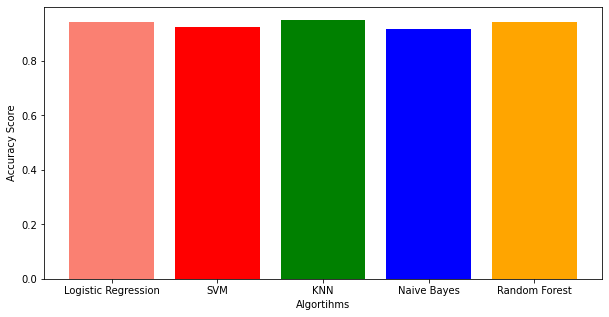

In [ ]:
# Plot the bar graph for accuracy and  roc-auc

# accuracy score
plt.figure(figsize=(10, 5))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], acc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')


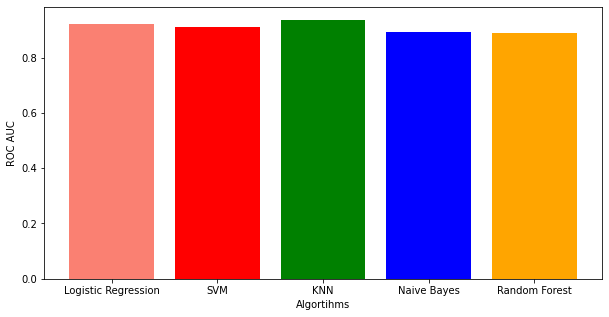

In [ ]:
# roc-auc
plt.figure(figsize=(10, 5))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], roc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()